In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import numpy

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [2]:
pip install numpy --downgrade

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\Administrator\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\Administrator\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\Administrator\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\Administrator\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\Administrator\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --downgrade


In [2]:
pip install numpy==1.21.6

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

In [2]:
tf.__version__

'2.12.0'

In [3]:
import pandas as pd
# fix random seed for reproducibility
seed = 7

# load pima indians dataset
dataset = pd.read_csv("pima-indians-diabetes.csv",header=None)
# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]


In [4]:
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:

X

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: 8, Length: 768, dtype: int64

In [7]:
dataset.shape

(768, 9)

In [8]:
# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=8, activation='tanh'))
model.add(tf.keras.layers.Dense(20,  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


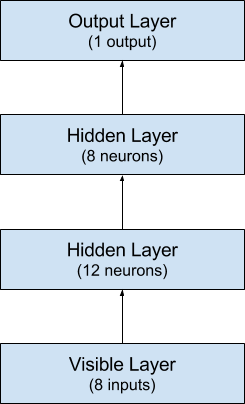

In [10]:
# Compile model  mini batch gradient d = stocastic gradient d + batch size
model.compile(loss ='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
# Fit the model
history=model.fit(X, Y, validation_split=0.20, epochs=50, batch_size=100)

Epoch 1/50
7/7 [==============================] - 2s 81ms/step - loss: 4.3000 - accuracy: 0.6124 - val_loss: 4.3036 - val_accuracy: 0.6364
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 3.9662 - accuracy: 0.6531 - val_loss: 7.8375 - val_accuracy: 0.4416
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 8.3342 - accuracy: 0.3404 - val_loss: 7.2189 - val_accuracy: 0.4805
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 7.1529 - accuracy: 0.4919 - val_loss: 9.8031 - val_accuracy: 0.3571
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 9.9592 - accuracy: 0.3469 - val_loss: 9.8031 - val_accuracy: 0.3571
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 9.9592 - accuracy: 0.3469 - val_loss: 9.8031 - val_accuracy: 0.3571
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 9.9592 - accuracy: 0.3469 - val_loss: 9.8031 - val_accuracy: 0.3571
Epoch 8/50
7/7 [===========

In [12]:
model.save_weights("mywt.kmw")

In [13]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 2ms/step - loss: 9.9279 - accuracy: 0.3490
accuracy: 34.90%


In [14]:
# Visualize training history

# list all data in history
model.history.history.keys()
import matplotlib.pyplot as plt

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

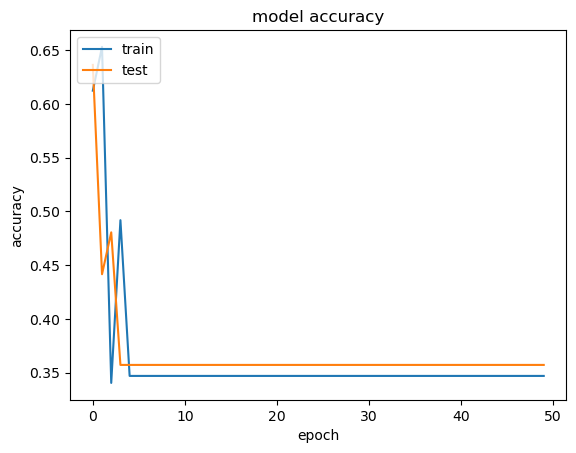

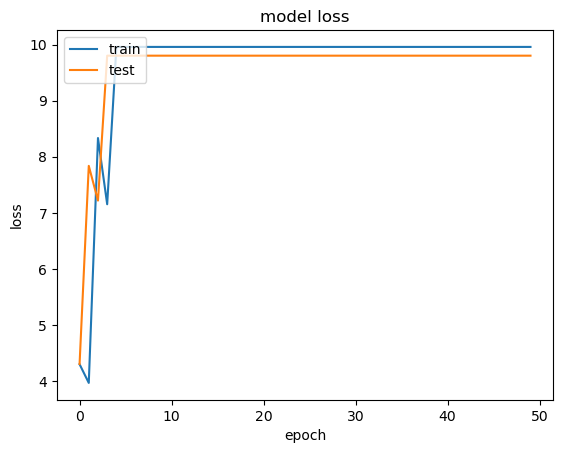

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
